In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


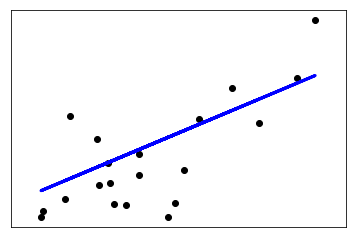

In [3]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [4]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred,
         multioutput='variance_weighted')

y_true = [1, 2, 3]
y_pred = [1, 2, 3]
r2_score(y_true, y_pred)

y_true = [1, 2, 3]
y_pred = [2, 2, 2]
r2_score(y_true, y_pred)

y_true = [1, 2, 3]
y_pred = [3, 2, 1]
r2_score(y_true, y_pred)

-3.0

In [5]:
"""
==========================
Non-negative least squares
==========================

In this example, we fit a linear model with positive constraints on the
regression coefficients and compare the estimated coefficients to a classic
linear regression.
"""
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# %%
# Generate some random data
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples, ))

# %%
# Split the data in train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# %%
# Fit the Non-Negative least squares.
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

# %%
# Fit an OLS.
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)


# %%
# Comparing the regression coefficients between OLS and NNLS, we can observe
# they are highly correlated (the dashed line is the identity relation),
# but the non-negative constraint shrinks some to 0.
# The Non-Negative Least squares inherently yield sparse results.

fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")



Non-negative least squares

In this example, we fit a linear model with positive constraints on the
regression coefficients and compare the estimated coefficients to a classic
linear regression.



TypeError: __init__() got an unexpected keyword argument 'positive'

In [7]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

print(reg.coef_)

reg.intercept_

[0.34545455 0.34545455]


0.13636363636363638

In [8]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


reg.alpha_


0.01


Non-negative least squares

In this example, we fit a linear model with positive constraints on the
regression coefficients and compare the estimated coefficients to a classic
linear regression.

-------------------- np.arange(1, 11)
[ 1  2  3  4  5  6  7  8  9 10]
-------------------- np.arange(0, 10)[:, np.newaxis]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
-------------------- X
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.111111

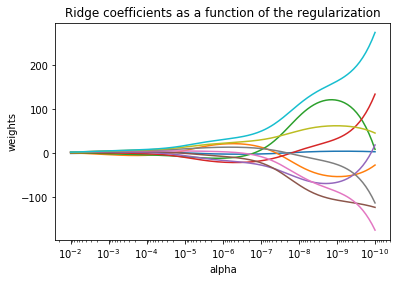

In [13]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

print("-" * 20, "np.arange(1, 11)")
print(np.arange(1, 11))


print("-" * 20, "np.arange(0, 10)[:, np.newaxis]")
print(np.arange(0, 10)[:, np.newaxis])


# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])


print("-" * 20, "X")
print(X)

y = np.ones(10)

print("-" * 20, "y")
print(y)


# #############################################################################
# Compute paths

n_alphas = 200

alphas = np.logspace(-10, -2, n_alphas)

print("-" * 20, "alphas")
print(alphas)


coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

    
print("-" * 20, "coefs[0]")
print(coefs[0])

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


Common pitfalls in interpretation of coefficients of linear models

In linear models, the target value is modeled as
a linear combination of the features (see the :ref:`linear_model` User Guide
section for a description of a set of linear models available in
scikit-learn).
Coefficients in multiple linear models represent the relationship between the
given feature, :math:`X_i` and the target, :math:`y`, assuming that all the
other features remain constant (`conditional dependence
<https://en.wikipedia.org/wiki/Conditional_dependence>`_).
This is different from plotting :math:`X_i` versus :math:`y` and fitting a
linear relationship: in that case all possible values of the other features are
taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear
models, pointing at problems that arise when either the linear model is not
appropriate to describe the dataset, or when features are correlated.

We will use data f

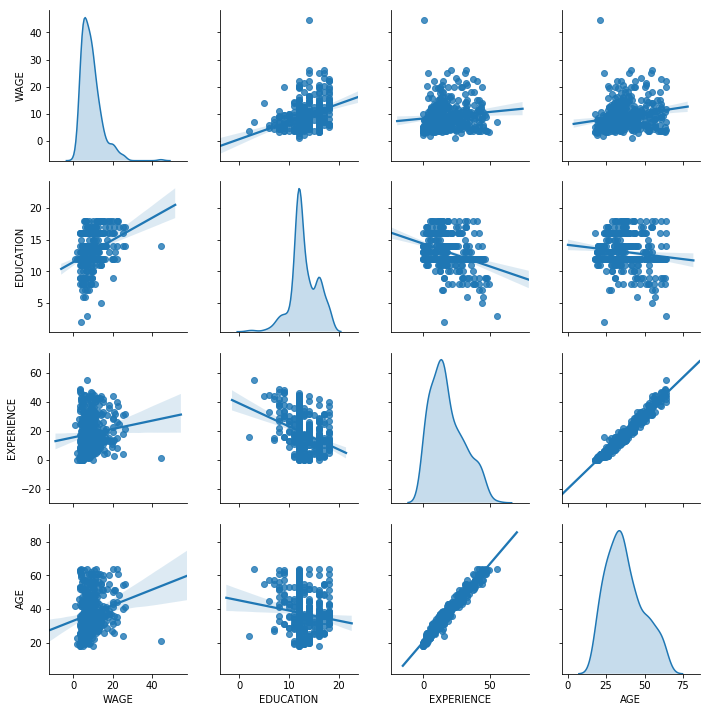

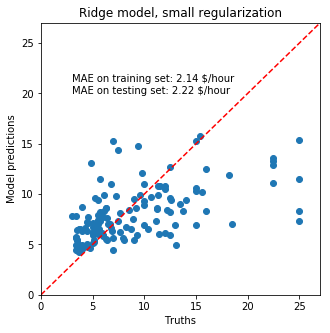

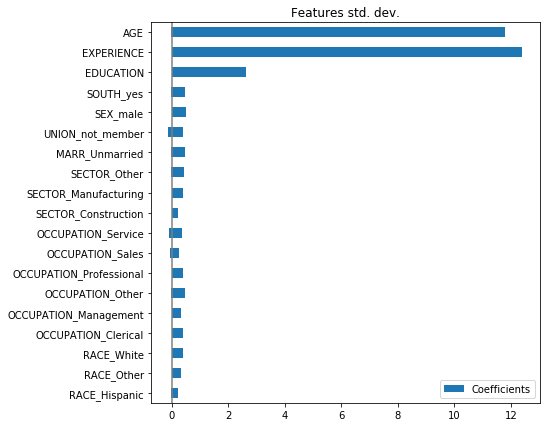

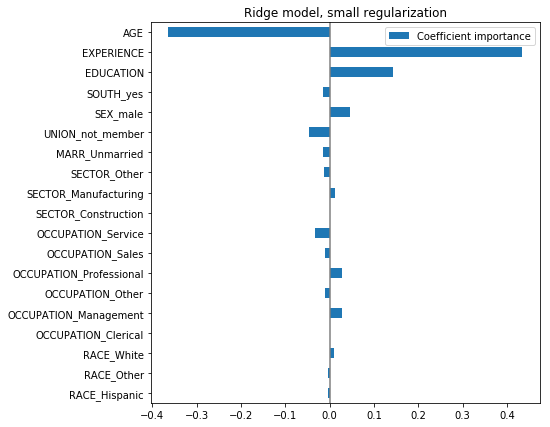

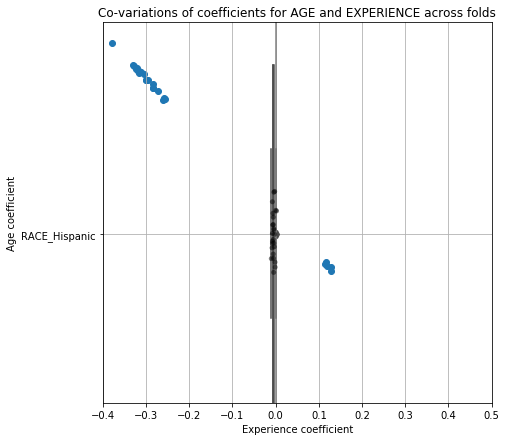

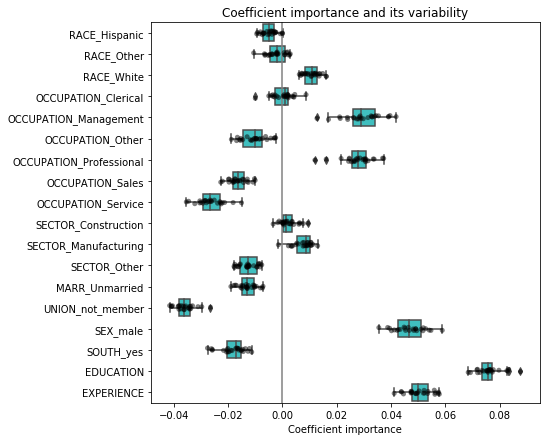

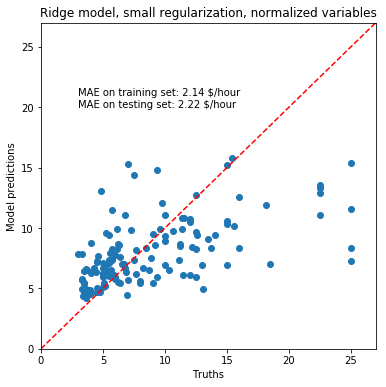

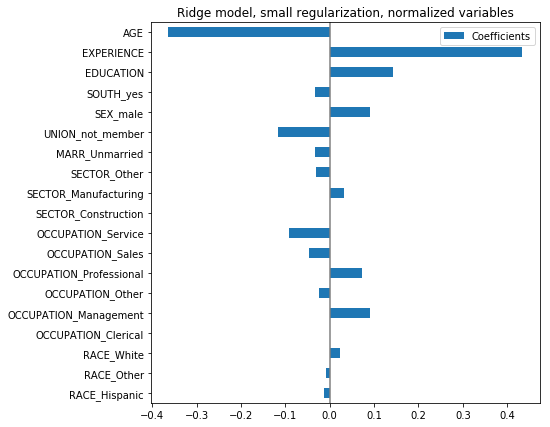

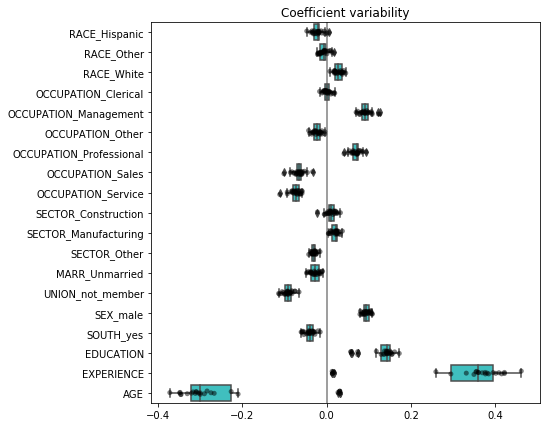

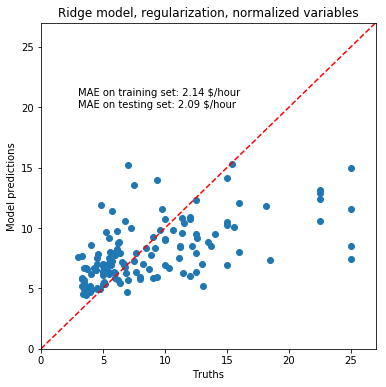

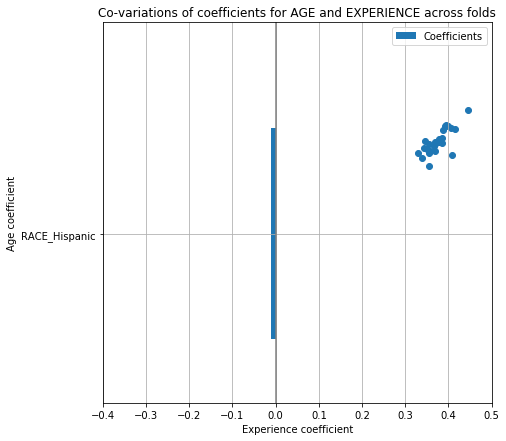

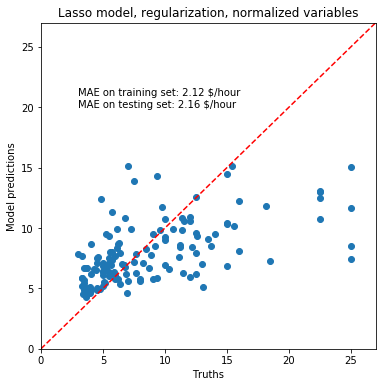

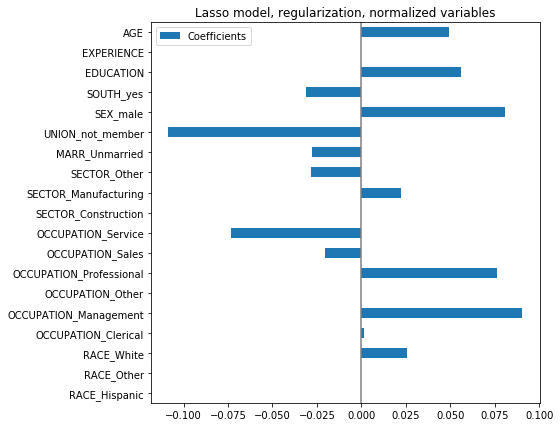

In [14]:
"""
==================================================================
Common pitfalls in interpretation of coefficients of linear models
==================================================================

In linear models, the target value is modeled as
a linear combination of the features (see the :ref:`linear_model` User Guide
section for a description of a set of linear models available in
scikit-learn).
Coefficients in multiple linear models represent the relationship between the
given feature, :math:`X_i` and the target, :math:`y`, assuming that all the
other features remain constant (`conditional dependence
<https://en.wikipedia.org/wiki/Conditional_dependence>`_).
This is different from plotting :math:`X_i` versus :math:`y` and fitting a
linear relationship: in that case all possible values of the other features are
taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear
models, pointing at problems that arise when either the linear model is not
appropriate to describe the dataset, or when features are correlated.

We will use data from the `"Current Population Survey"
<https://www.openml.org/d/534>`_ from 1985 to predict
wage as a function of various features such as experience, age, or education.

.. contents::
   :local:
   :depth: 1
"""

print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %%
# The dataset: wages
# ------------------
#
# We fetch the data from `OpenML <http://openml.org/>`_.
# Note that setting the parameter `as_frame` to True will retrieve the data
# as a pandas dataframe.

from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

# %%
# Then, we identify features `X` and targets `y`: the column WAGE is our
# target variable (i.e., the variable which we want to predict).
#
X = survey.data[survey.feature_names]
X.describe(include="all")

# %%
# Note that the dataset contains categorical and numerical variables.
# We will need to take this into account when preprocessing the dataset
# thereafter.

X.head()

# %%
# Our target for prediction: the wage.
# Wages are described as floating-point number in dollars per hour.
y = survey.target.values.ravel()
survey.target.head()

# %%
# We split the sample into a train and a test dataset.
# Only the train dataset will be used in the following exploratory analysis.
# This is a way to emulate a real situation where predictions are performed on
# an unknown target, and we don't want our analysis and decisions to be biased
# by our knowledge of the test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

# %%
# First, let's get some insights by looking at the variable distributions and
# at the pairwise relationships between them. Only numerical
# variables will be used. In the following plot, each dot represents a sample.
#
#   .. _marginal_dependencies:

train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

# %%
# Looking closely at the WAGE distribution reveals that it has a
# long tail. For this reason, we should take its logarithm
# to turn it approximately into a normal distribution (linear models such
# as ridge or lasso work best for a normal distribution of error).
#
# The WAGE is increasing when EDUCATION is increasing.
# Note that the dependence between WAGE and EDUCATION
# represented here is a marginal dependence, i.e., it describes the behavior
# of a specific variable without keeping the others fixed.
#
# Also, the EXPERIENCE and AGE are strongly linearly correlated.
#
# .. _the-pipeline:
#
# The machine-learning pipeline
# -----------------------------
#
# To design our machine-learning pipeline, we first manually
# check the type of data that we are dealing with:

survey.data.info()

# %%
# As seen previously, the dataset contains columns with different data types
# and we need to apply a specific preprocessing for each data types.
# In particular categorical variables cannot be included in linear model if not
# coded as integers first. In addition, to avoid categorical features to be
# treated as ordered values, we need to one-hot-encode them.
# Our pre-processor will
#
# - one-hot encode (i.e., generate a column by category) the categorical
#   columns;
# - as a first approach (we will see after how the normalisation of numerical
#   values will affect our discussion), keep numerical values as they are.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['RACE', 'OCCUPATION', 'SECTOR',
                       'MARR', 'UNION', 'SEX', 'SOUTH']
numerical_columns = ['EDUCATION', 'EXPERIENCE', 'AGE']

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    remainder='passthrough'
)

# %%
# To describe the dataset as a linear model we use a ridge regressor
# with a very small regularization and to model the logarithm of the WAGE.


from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

# %%
# Processing the dataset
# ----------------------
#
# First, we fit the model.

_ = model.fit(X_train, y_train)

# %%
# Then we check the performance of the computed model plotting its predictions
# on the test set and computing,
# for example, the median absolute error of the model.

from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title('Ridge model, small regularization')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

# %%
# The model learnt is far from being a good model making accurate predictions:
# this is obvious when looking at the plot above, where good predictions
# should lie on the red line.
#
# In the following section, we will interpret the coefficients of the model.
# While we do so, we should keep in mind that any conclusion we draw is
# about the model that we build, rather than about the true (real-world)
# generative process of the data.
#
# Interpreting coefficients: scale matters
# ---------------------------------------------
#
# First of all, we can take a look to the values of the coefficients of the
# regressor we have fitted.

feature_names = (model.named_steps['columntransformer']
                      .named_transformers_['onehotencoder']
                      .get_feature_names(input_features=categorical_columns))
feature_names = np.concatenate(
    [feature_names, numerical_columns])

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)

coefs

# %%
# The AGE coefficient is expressed in "dollars/hour per living years" while the
# EDUCATION one is expressed in "dollars/hour per years of education". This
# representation of the coefficients has the benefit of making clear the
# practical predictions of the model: an increase of :math:`1` year in AGE
# means a decrease of :math:`0.030867` dollars/hour, while an increase of
# :math:`1` year in EDUCATION means an increase of :math:`0.054699`
# dollars/hour. On the other hand, categorical variables (as UNION or SEX) are
# adimensional numbers taking either the value 0 or 1. Their coefficients
# are expressed in dollars/hour. Then, we cannot compare the magnitude of
# different coefficients since the features have different natural scales, and
# hence value ranges, because of their different unit of measure. This is more
# visible if we plot the coefficients.

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# %%
# Indeed, from the plot above the most important factor in determining WAGE
# appears to be the
# variable UNION, even if our intuition might tell us that variables
# like EXPERIENCE should have more impact.
#
# Looking at the coefficient plot to gauge feature importance can be
# misleading as some of them vary on a small scale, while others, like AGE,
# varies a lot more, several decades.
#
# This is visible if we compare the standard deviations of different
# features.

X_train_preprocessed = pd.DataFrame(
    model.named_steps['columntransformer'].transform(X_train),
    columns=feature_names
)

X_train_preprocessed.std(axis=0).plot(kind='barh', figsize=(9, 7))
plt.title('Features std. dev.')
plt.subplots_adjust(left=.3)

# %%
# Multiplying the coefficients by the standard deviation of the related
# feature would reduce all the coefficients to the same unit of measure.
# As we will see :ref:`after<scaling_num>` this is equivalent to normalize
# numerical variables to their standard deviation,
# as :math:`y = \sum{coef_i \times X_i} =
# \sum{(coef_i \times std_i) \times (X_i / std_i)}`.
#
# In that way, we emphasize that the
# greater the variance of a feature, the larger the weight of the corresponding
# coefficient on the output, all else being equal.

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_ *
    X_train_preprocessed.std(axis=0),
    columns=['Coefficient importance'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# %%
# Now that the coefficients have been scaled, we can safely compare them.
#
# .. warning::
#
#   Why does the plot above suggest that an increase in age leads to a
#   decrease in wage? Why the :ref:`initial pairplot
#   <marginal_dependencies>` is telling the opposite?
#
# The plot above tells us about dependencies between a specific feature and
# the target when all other features remain constant, i.e., **conditional
# dependencies**. An increase of the AGE will induce a decrease
# of the WAGE when all other features remain constant. On the contrary, an
# increase of the EXPERIENCE will induce an increase of the WAGE when all
# other features remain constant.
# Also, AGE, EXPERIENCE and EDUCATION are the three variables that most
# influence the model.
#
# Checking the variability of the coefficients
# --------------------------------------------
#
# We can check the coefficient variability through cross-validation:
# it is a form of data perturbation (related to
# `resampling <https://en.wikipedia.org/wiki/Resampling_(statistics)>`_).
#
# If coefficients vary significantly when changing the input dataset
# their robustness is not guaranteed, and they should probably be interpreted
# with caution.

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

# %%
# The problem of correlated variables
# -----------------------------------
#
# The AGE and EXPERIENCE coefficients are affected by strong variability which
# might be due to the collinearity between the 2 features: as AGE and
# EXPERIENCE vary together in the data, their effect is difficult to tease
# apart.
#
# To verify this interpretation we plot the variability of the AGE and
# EXPERIENCE coefficient.
#
# .. _covariation:

plt.ylabel('Age coefficient')
plt.xlabel('Experience coefficient')
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title('Co-variations of coefficients for AGE and EXPERIENCE '
              'across folds')

# %%
# Two regions are populated: when the EXPERIENCE coefficient is
# positive the AGE one is negative and viceversa.
#
# To go further we remove one of the 2 features and check what is the impact
# on the model stability.

column_to_drop = ['AGE']

cv_model = cross_validate(
    model, X.drop(columns=column_to_drop), y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.drop(columns=column_to_drop).std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names[:-1]
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.title('Coefficient importance and its variability')
plt.xlabel('Coefficient importance')
plt.subplots_adjust(left=.3)

# %%
# The estimation of the EXPERIENCE coefficient is now less variable and
# remain important for all models trained during cross-validation.
#
# .. _scaling_num:
#
# Preprocessing numerical variables
# ---------------------------------
#
# As said above (see ":ref:`the-pipeline`"), we could also choose to scale
# numerical values before training the model.
# This can be useful to apply a similar amount regularization to all of them
# in the Ridge.
# The preprocessor is redefined in order to subtract the mean and scale
# variables to unit variance.

from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder='passthrough'
)

# %%
# The model will stay unchanged.

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

# %%
# Again, we check the performance of the computed
# model using, for example, the median absolute error of the model and the R
# squared coefficient.

y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Ridge model, small regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

# %%
# For the coefficient analysis, scaling is not needed this time.

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, small regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# %%
# We now inspect the coefficients across several cross-validation folds.

cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_
     for est in cv_model['estimator']],
    columns=feature_names
)
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.title('Coefficient variability')
plt.subplots_adjust(left=.3)

# %%
# The result is quite similar to the non-normalized case.
#
# Linear models with regularization
# ---------------------------------
#
# In machine-learning practice, Ridge Regression is more often used with
# non-negligible regularization.
#
# Above, we limited this regularization to a very little amount.
# Regularization improves the conditioning of the problem and reduces the
# variance of the estimates. RidgeCV applies cross validation in order to
# determine which value of the regularization parameter (`alpha`) is best
# suited for prediction.

from sklearn.linear_model import RidgeCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=np.logspace(-10, 10, 21)),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

# %%
# First we check which value of :math:`\alpha` has been selected.

model[-1].regressor_.alpha_

# %%
# Then we check the quality of the predictions.

y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Ridge model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

# %%
# The ability to reproduce the data of the regularized model is similar to
# the one of the non-regularized model.

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# %%
# The coefficients are significantly different.
# AGE and EXPERIENCE coefficients are both positive but they now have less
# influence on the prediction.
#
# The regularization reduces the influence of correlated
# variables on the model because the weight is shared between the two
# predictive variables, so neither alone would have strong weights.
#
# On the other hand, the weights obtained with regularization are more
# stable  (see the :ref:`ridge_regression` User Guide section). This
# increased stability is visible from the plot, obtained from data
# perturbations, in a cross validation. This plot can  be compared with
# the :ref:`previous one<covariation>`.

cv_model = cross_validate(
    model, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True, n_jobs=-1
)
coefs = pd.DataFrame(
    [est.named_steps['transformedtargetregressor'].regressor_.coef_ *
     X_train_preprocessed.std(axis=0)
     for est in cv_model['estimator']],
    columns=feature_names
)

plt.ylabel('Age coefficient')
plt.xlabel('Experience coefficient')
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title('Co-variations of coefficients for AGE and EXPERIENCE '
              'across folds')

# %%
# Linear models with sparse coefficients
# --------------------------------------
#
# Another possibility to take into account correlated variables in the dataset,
# is to estimate sparse coefficients. In some way we already did it manually
# when we dropped the AGE column in a previous Ridge estimation.
#
# Lasso models (see the :ref:`lasso` User Guide section) estimates sparse
# coefficients. LassoCV applies cross validation in order to
# determine which value of the regularization parameter (`alpha`) is best
# suited for the model estimation.

from sklearn.linear_model import LassoCV

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=np.logspace(-10, 10, 21), max_iter=100000),
        func=np.log10,
        inverse_func=sp.special.exp10
    )
)

_ = model.fit(X_train, y_train)

# %%
# First we verify which value of :math:`\alpha` has been selected.

model[-1].regressor_.alpha_

# %%
# Then we check the quality of the predictions.

y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f'MAE on training set: {mae:.2f} $/hour'
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f'\nMAE on testing set: {mae:.2f} $/hour'

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title('Lasso model, regularization, normalized variables')
plt.ylabel('Model predictions')
plt.xlabel('Truths')
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

# %%
# For our dataset, again the model is not very predictive.

coefs = pd.DataFrame(
    model.named_steps['transformedtargetregressor'].regressor_.coef_,
    columns=['Coefficients'], index=feature_names
)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, regularization, normalized variables')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# %%
# A Lasso model identifies the correlation between
# AGE and EXPERIENCE and suppresses one of them for the sake of the prediction.
#
# It is important to keep in mind that the coefficients that have been
# dropped may still be related to the outcome by themselves: the model
# chose to suppress them because they bring little or no additional
# information on top of the other features. Additionnaly, this selection
# is unstable for correlated features, and should be interpreted with
# caution.
#
# Lessons learned
# ---------------
#
# * Coefficients must be scaled to the same unit of measure to retrieve
#   feature importance. Scaling them with the standard-deviation of the
#   feature is a useful proxy.
# * Coefficients in multivariate linear models represent the dependency
#   between a given feature and the target, **conditional** on the other
#   features.
# * Correlated features induce instabilities in the coefficients of linear
#   models and their effects cannot be well teased apart.
# * Different linear models respond differently to feature correlation and
#   coefficients could significantly vary from one another.
# * Inspecting coefficients across the folds of a cross-validation loop
#   gives an idea of their stability.


In [15]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

reg.predict([[1, 1]])


array([0.8])

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx', use_line_collection=True)

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()


Common pitfalls in interpretation of coefficients of linear models

In linear models, the target value is modeled as
a linear combination of the features (see the :ref:`linear_model` User Guide
section for a description of a set of linear models available in
scikit-learn).
Coefficients in multiple linear models represent the relationship between the
given feature, :math:`X_i` and the target, :math:`y`, assuming that all the
other features remain constant (`conditional dependence
<https://en.wikipedia.org/wiki/Conditional_dependence>`_).
This is different from plotting :math:`X_i` versus :math:`y` and fitting a
linear relationship: in that case all possible values of the other features are
taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear
models, pointing at problems that arise when either the linear model is not
appropriate to describe the dataset, or when features are correlated.

We will use data f

TypeError: stem() got an unexpected keyword argument 'use_line_collection'


Common pitfalls in interpretation of coefficients of linear models

In linear models, the target value is modeled as
a linear combination of the features (see the :ref:`linear_model` User Guide
section for a description of a set of linear models available in
scikit-learn).
Coefficients in multiple linear models represent the relationship between the
given feature, :math:`X_i` and the target, :math:`y`, assuming that all the
other features remain constant (`conditional dependence
<https://en.wikipedia.org/wiki/Conditional_dependence>`_).
This is different from plotting :math:`X_i` versus :math:`y` and fitting a
linear relationship: in that case all possible values of the other features are
taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear
models, pointing at problems that arise when either the linear model is not
appropriate to describe the dataset, or when features are correlated.

We will use data f

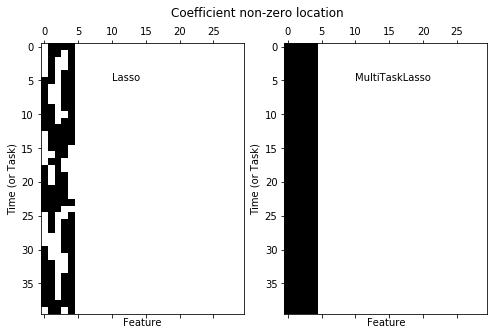

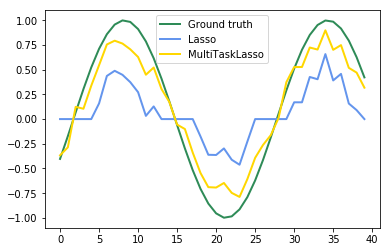

In [19]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

print("-"*20, "X.shape")
print(X.shape)

print("-"*20, "Y.shape")
print(Y.shape)



coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

# #############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()


Common pitfalls in interpretation of coefficients of linear models

In linear models, the target value is modeled as
a linear combination of the features (see the :ref:`linear_model` User Guide
section for a description of a set of linear models available in
scikit-learn).
Coefficients in multiple linear models represent the relationship between the
given feature, :math:`X_i` and the target, :math:`y`, assuming that all the
other features remain constant (`conditional dependence
<https://en.wikipedia.org/wiki/Conditional_dependence>`_).
This is different from plotting :math:`X_i` versus :math:`y` and fitting a
linear relationship: in that case all possible values of the other features are
taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear
models, pointing at problems that arise when either the linear model is not
appropriate to describe the dataset, or when features are correlated.

We will use data f

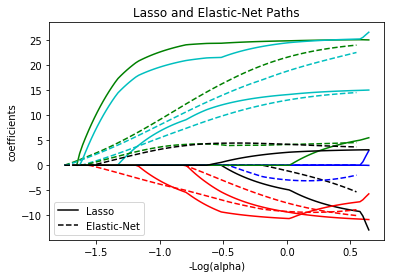

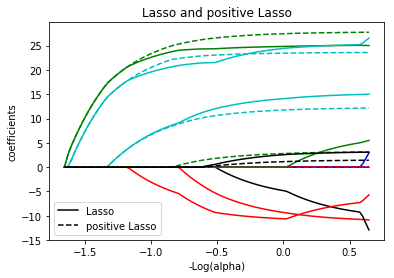

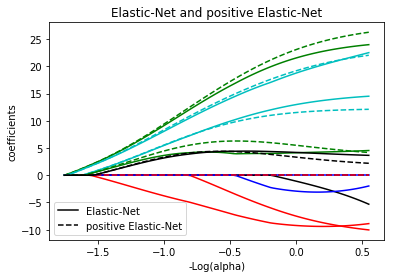

In [20]:
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

In [21]:
from sklearn import linear_model
clf = linear_model.MultiTaskElasticNet(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [[0, 0], [1, 1], [2, 2]])

print(clf.coef_)


print(clf.intercept_)

[[0.45663524 0.45612256]
 [0.45663524 0.45612256]]
[0.0872422 0.0872422]



Common pitfalls in interpretation of coefficients of linear models

In linear models, the target value is modeled as
a linear combination of the features (see the :ref:`linear_model` User Guide
section for a description of a set of linear models available in
scikit-learn).
Coefficients in multiple linear models represent the relationship between the
given feature, :math:`X_i` and the target, :math:`y`, assuming that all the
other features remain constant (`conditional dependence
<https://en.wikipedia.org/wiki/Conditional_dependence>`_).
This is different from plotting :math:`X_i` versus :math:`y` and fitting a
linear relationship: in that case all possible values of the other features are
taken into account in the estimation (marginal dependence).

This example will provide some hints in interpreting coefficient in linear
models, pointing at problems that arise when either the linear model is not
appropriate to describe the dataset, or when features are correlated.

We will use data f

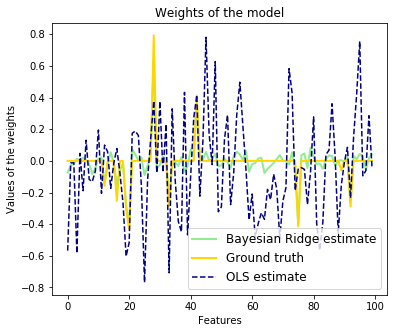

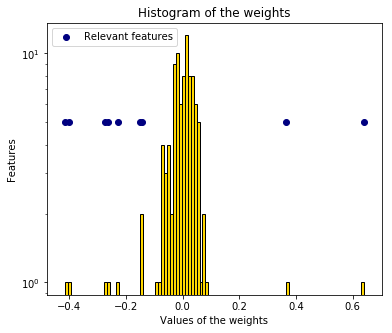

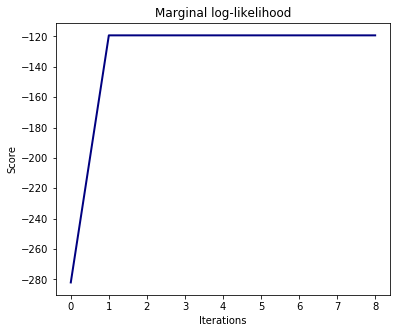

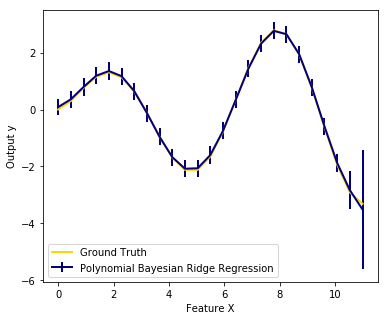

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()